In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# List of (Ticker, Weight) in portfolio
df = pd.read_excel("portfolio/example2.xlsx")

required_columns = ["Tickers", "Weights"]
if all(col in df.columns for col in required_columns):
    print("Found 'Tickers' and 'Weights' columns.")
else:
    missing = [col for col in required_columns if col not in df.columns]
    print(f"Missing columns: {missing}")

portfolio = []
for i in range(len(df)):
    portfolio.append([df.loc[i, 'Tickers'], df.loc[i, 'Weights']])

tickers = [i[0] for i in portfolio]
weights = np.array([i[1] for i in portfolio])
tickers, weights

Found 'Tickers' and 'Weights' columns.


(['AAPL', 'NVDA', 'SPY', 'VYM'], array([0.25, 0.25, 0.25, 0.25]))

In [3]:
yf_tickers = yf.Tickers(tickers)
stock_data = yf_tickers.history(period='2y', interval='1d')
stock_data

[*********************100%***********************]  4 of 4 completed


Price      Capital Gains            Close                                       
Ticker               SPY  VYM        AAPL        NVDA         SPY         VYM   
Date                                                                            
2023-05-01           0.0  0.0  167.896790   28.891237  404.431458  100.522118  \
2023-05-02           0.0  0.0  166.857300   28.191689  399.885925   98.771286   
2023-05-03           0.0  0.0  165.778152   27.783955  397.141144   97.811157   
2023-05-04           0.0  0.0  164.134720   27.544109  394.328217   96.832191   
2023-05-05           0.0  0.0  171.837082   28.661388  401.628235   98.404167   
...                  ...  ...         ...         ...         ...         ...   
2025-04-23           0.0  0.0  204.600006  102.709999  535.419983  121.860001   
2025-04-24           0.0  0.0  208.369995  106.430000  546.690002  123.419998   
2025-04-25           0.0  0.0  209.279999  111.010002  550.640015  123.300003   
2025-04-28           0.0  0.0  210.139999  108.730003  550.849976  123.760002   
2025-04-29           0.0  0.0  211.220001  109.360001  554.456177  124.410004   

Price      Dividends                 ...        Open             Stock Splits   
Ticker          AAPL NVDA  SPY  VYM  ...         SPY         VYM         AAPL   
Date                                 ...                                        
2023-05-01       0.0  0.0  0.0  0.0  ...  404.392516  100.569179          0.0  \
2023-05-02       0.0  0.0  0.0  0.0  ...  403.711134  100.173831          0.0   
2023-05-03       0.0  0.0  0.0  0.0  ...  400.392087   98.837178          0.0   
2023-05-04       0.0  0.0  0.0  0.0  ...  396.080212   97.387559          0.0   
2023-05-05       0.0  0.0  0.0  0.0  ...  398.007418   97.858208          0.0   
...              ...  ...  ...  ...  ...         ...         ...          ...   
2025-04-23       0.0  0.0  0.0  0.0  ...  540.429993  122.779999          0.0   
2025-04-24       0.0  0.0  0.0  0.0  ...  536.719971  121.900002          0.0   
2025-04-25       0.0  0.0  0.0  0.0  ...  546.650024  123.180000          0.0   
2025-04-28       0.0  0.0  0.0  0.0  ...  551.390015  123.449997          0.0   
2025-04-29       0.0  0.0  0.0  0.0  ...  548.909973  123.269997          0.0   

Price                         Volume                                 
Ticker     NVDA  SPY  VYM       AAPL       NVDA        SPY      VYM  
Date                                                                 
2023-05-01  0.0  0.0  0.0   52472900  570329000   62122300  1277200  
2023-05-02  0.0  0.0  0.0   48425700  402730000  103998500  4638900  
2023-05-03  0.0  0.0  0.0   65136000  383387000   91531800  1844400  
2023-05-04  0.0  0.0  0.0   81235400  321850000   94901900  1747900  
2023-05-05  0.0  0.0  0.0  113316400  361494000   87844000  1162700  
...         ...  ...  ...        ...        ...        ...      ...  
2025-04-23  0.0  0.0  0.0   52929200  247526000   90590700  1093000  
2025-04-24  0.0  0.0  0.0   47311000  220815000   64150400   782300  
2025-04-25  0.0  0.0  0.0   38222300  251064700   61119600   756800  
2025-04-28  0.0  0.0  0.0   38652400  207051900   47476700   988300  
2025-04-29  0.0  0.0  0.0   22602240  134433617   34149317   833470  

[501 rows x 30 columns]

In [4]:
close_prices = stock_data['Close']
close_prices

Ticker,AAPL,NVDA,SPY,VYM
Date,,,,
2023-05-01,167.896790,28.891237,404.431458,100.522118
2023-05-02,166.857300,28.191689,399.885925,98.771286
2023-05-03,165.778152,27.783955,397.141144,97.811157
2023-05-04,164.134720,27.544109,394.328217,96.832191
2023-05-05,171.837082,28.661388,401.628235,98.404167
...,...,...,...,...
2025-04-23,204.600006,102.709999,535.419983,121.860001
2025-04-24,208.369995,106.430000,546.690002,123.419998
2025-04-25,209.279999,111.010002,550.640015,123.300003


In [5]:
returns = close_prices.pct_change().dropna()
returns

Ticker,AAPL,NVDA,SPY,VYM
Date,,,,
2023-05-02,-0.006191,-0.024213,-0.011239,-0.017417
2023-05-03,-0.006467,-0.014463,-0.006864,-0.009721
2023-05-04,-0.009913,-0.008633,-0.007083,-0.010009
2023-05-05,0.046927,0.040563,0.018513,0.016234
2023-05-08,-0.000403,0.016423,0.000267,-0.000765
...,...,...,...,...
2025-04-23,0.024332,0.038629,0.015495,0.006608
2025-04-24,0.018426,0.036218,0.021049,0.012802
2025-04-25,0.004367,0.043033,0.007225,-0.000972


In [6]:
mean_returns = returns.mean()
mean_returns

Ticker
AAPL    0.000602
NVDA    0.003253
SPY     0.000684
VYM     0.000463
dtype: float64

In [7]:
cov = returns.cov()
cov

Ticker,AAPL,NVDA,SPY,VYM
Ticker,,,,
AAPL,0.000288,0.000229,0.000126,0.000075
NVDA,0.000229,0.001196,0.000232,0.000093
SPY,0.000126,0.000232,0.000107,0.000074
VYM,0.000075,0.000093,0.000074,0.000073


In [8]:
num_sims = 10_000
future_days = 100

mean_returns = np.full(shape=(future_days, len(weights)), fill_value=mean_returns).T
mean_returns.shape

(4, 100)

In [9]:
investment = 10_000
paths = np.full(shape=(future_days, num_sims), fill_value=0.0)  # N x T

for n in range(num_sims):
    Z = np.random.normal(size=(future_days, len(weights)))  # T x S
    L = np.linalg.cholesky(cov)                             # S x S
    daily_returns = mean_returns + np.inner(L, Z)           # S x T + S x T
    paths[:, n] = np.cumprod(np.inner(weights, daily_returns.T) + 1) * investment


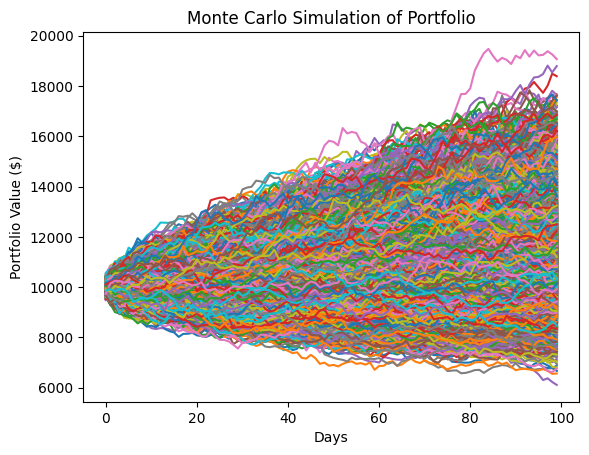

In [10]:
plt.plot(paths)
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.title("Monte Carlo Simulation of Portfolio")
plt.show()

In [11]:
def mcVaR(returns, alpha=5):
    return np.percentile(returns, alpha)

def mcCVaR(returns, alpha=5):
    belowVaR = returns <= mcVaR(returns, alpha)
    return returns[belowVaR].mean()

In [12]:
confidence_interval = 95
portfolio_results = paths[-1, :]    # Get last day of all simulations

VaR = investment - mcVaR(portfolio_results, alpha=100-confidence_interval)
CVaR = investment - mcCVaR(portfolio_results, alpha=100-confidence_interval)

print(f"{f'Value at Risk {confidence_interval}th CI:':25} ${round(VaR, 2)}")
print(f"{f'Conditional VaR {confidence_interval}th CI:':25} ${round(CVaR, 2)}")

Value at Risk 95th CI:    $1151.65
Conditional VaR 95th CI:  $1645.2
